In [1]:
from sqlalchemy import create_engine
import pandas as pd

In [2]:
cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
               "@{host}:{port}/{database}")
print(cnxn_string)

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


In [3]:
engine = create_engine(cnxn_string.format(
    username="postgres", 
    pswd="1", 
    host="localhost", 
    port=5432,
    database="sqlda"))  

In [4]:
engine.execute('SELECT * FROM customers LIMIT 2;').fetchall()

[(1, None, 'Arlena', 'Riveles', None, 'ariveles0@stumbleupon.com', 'F', '98.36.172.246', None, None, None, None, None, None, None, datetime.datetime(2017, 4, 23, 0, 0)),
 (2, 'Dr', 'Ode', 'Stovin', None, 'ostovin1@npr.org', 'M', '16.97.59.186', '314-534-4361', '2573 Fordem Parkway', 'Saint Louis', 'MO', '63116', 38.5814, -90.2625, datetime.datetime(2014, 10, 2, 0, 0))]

In [5]:
customers_data = pd.read_sql_table('customers', engine)

In [6]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     50000 non-null  int64         
 1   title           2471 non-null   object        
 2   first_name      50000 non-null  object        
 3   last_name       50000 non-null  object        
 4   suffix          532 non-null    object        
 5   email           50000 non-null  object        
 6   gender          50000 non-null  object        
 7   ip_address      50000 non-null  object        
 8   phone           34692 non-null  object        
 9   street_address  44533 non-null  object        
 10  city            44533 non-null  object        
 11  state           44533 non-null  object        
 12  postal_code     44533 non-null  object        
 13  latitude        44533 non-null  float64       
 14  longitude       44533 non-null  float64       
 15  da

In [12]:
# Количество городов в каждом штате
customers_data[['state','city']].drop_duplicates().groupby('state').count().sort_values(by=['city'], ascending=False)

,city
state,
CA,65
FL,48
TX,39
VA,25
NY,20
PA,16
GA,16
IL,15
MI,15


In [41]:
# Вывести города для определенного штата
customers_data[['state','city']].drop_duplicates().loc[customers_data['state']=='TN']

,state,city
3,TN,Nashville
50,TN,Memphis
68,TN,Murfreesboro
184,TN,Kingsport
446,TN,Knoxville
580,TN,Jackson
671,TN,Johnson City
813,TN,Chattanooga


In [50]:
query = """
    SELECT city,
           COUNT(1) AS number_of_customers,
           COUNT(NULLIF(gender, 'M')) AS female,
           COUNT(NULLIF(gender, 'F')) AS male
    FROM customers
    WHERE city IS NOT NULL
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 15
"""

In [51]:
top_cities_data = pd.read_sql_query(query, engine)

In [52]:
top_cities_data

,city,number_of_customers,female,male
0,Washington,1447,734,713
1,Houston,904,446,458
2,New York City,731,369,362
3,El Paso,713,369,344
4,Dallas,607,309,298
5,Atlanta,571,292,279
6,Sacramento,506,244,262
7,Los Angeles,466,241,225
8,San Antonio,426,207,219
9,Miami,426,195,231


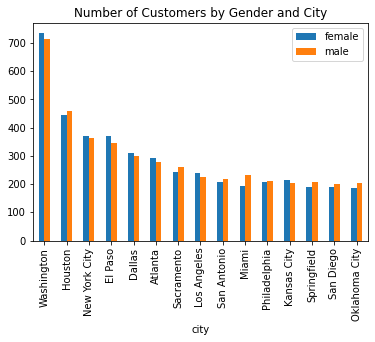

In [53]:
ax = top_cities_data.plot.bar('city', y=['female', 'male'], title='Number of Customers by Gender and City')

In [54]:
top_cities_data.to_sql('top_cities_data', engine, index=False, if_exists='replace')

15

In [8]:
customers_data[['state','city']].drop_duplicates()['state'].value_counts()

CA    65
FL    48
TX    39
VA    25
NY    20
PA    16
GA    16
MI    15
IL    15
OH    13
MD    12
IN    12
CO    11
AZ    11
MA    11
NC    10
WA    10
SC     9
MN     9
CT     9
MO     8
LA     8
TN     8
NJ     7
AL     7
MS     6
NV     6
IA     6
KY     5
WI     5
MT     4
OR     4
UT     4
KS     4
OK     4
AR     4
ID     3
NM     3
WV     3
AK     3
ND     3
NH     2
NE     2
DE     2
RI     1
WY     1
SD     1
ME     1
DC     1
HI     1
VT     1
Name: state, dtype: int64